# Insights for new CO2 emmissions guidelines

## Background
You volunteer for a public policy advocacy organization in Canada, and your colleague asked you to help her draft recommendations for guidelines on CO2 emissions rules. 

After researching emissions data for a wide range of Canadian vehicles, she would like you to investigate which vehicles produce lower emissions.

## The Data

### You have access to seven years of CO2 emissions data for Canadian vehicles ([source](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64#wb-auto-6)):

- ***Make*** - The company that manufactures the vehicle.
- ***Model*** - The vehicle's model.
- ***Vehicle Class*** - Vehicle class by utility, capacity, and weight.
- ***Engine Size(L)*** - The engine's displacement in liters.
- ***Cylinders*** - The number of cylinders.
- ***Transmission*** - The transmission type: A = Automatic, AM = Automatic Manual, AS = Automatic with select shift, AV = Continuously variable, M = Manual, 3 - 10 = the number of gears.
- ***Fuel Type*** - The fuel type: X = Regular gasoline, Z = Premium gasoline, D = Diesel, E = Ethanol (E85), N = natural gas.
- ***Fuel Consumption Comb (L/100 km)*** - Combined city/highway (55%/45%) fuel consumption in liters per 100 km (L/100 km).
- ***CO2 Emissions(g/km)*** - The tailpipe carbon dioxide emissions in grams per kilometer for combined city and highway driving. 

The data comes from the Government of Canada's open data [website](https://open.canada.ca/en).

In [1]:
# Import the pandas and numpy packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load the data
cars = pd.read_csv('co2_emissions_canada.csv')

# Preview the dataframe
cars

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.6,244
...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.4,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.9,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,10.3,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,9.9,232


In [2]:
# Check the dataframe info
cars.info()

cars.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 8   CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 519.4+ KB


,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,10.975071,250.584699
std,1.354170,1.828307,2.892506,58.512679
min,0.900000,3.000000,4.100000,96.000000
25%,2.000000,4.000000,8.900000,208.000000
50%,3.000000,6.000000,10.600000,246.000000
75%,3.700000,6.000000,12.600000,288.000000
max,8.400000,16.000000,26.100000,522.000000


- **So far, I don't see anything out of the ordinary, and do not see any missing values in any of the columns**
- **I am going to change the column names to lowercase and add an underscore to the existing spaces. The reasoning is to make sure our attributes don't get mistaken for separate values to the user.**

In [3]:
# Replacing spaces with underscores and making each column name lowercase
cars.columns = cars.columns.str.replace(' ', '_').str.lower()
cars.rename(columns={'fuel_consumption_comb_(l/100_km)' : 'fuel_consumption_comb_(l/100km)'}, inplace = True)

# Converting values in make, model, and vehicle class to lowercase for uniformity
cars['make'] = cars['make'].str.lower()
cars['model'] = cars['model'].str.lower()
cars['vehicle_class'] = cars['vehicle_class'].str.lower()

# Checking that the changes were implemented correctly
cars.head()

,make,model,vehicle_class,engine_size(l),cylinders,transmission,fuel_type,fuel_consumption_comb_(l/100km),co2_emissions(g/km)
0,acura,ilx,compact,2.0,4,AS5,Z,8.5,196
1,acura,ilx,compact,2.4,4,M6,Z,9.6,221
2,acura,ilx hybrid,compact,1.5,4,AV7,Z,5.9,136
3,acura,mdx 4wd,suv - small,3.5,6,AS6,Z,11.1,255
4,acura,rdx awd,suv - small,3.5,6,AS6,Z,10.6,244


### Question 1: What is the median engine size in liters?

In [4]:
# Obtaining the median engine size for all rows in the dataset
median_enginesize = cars['engine_size(l)'].median()

# Printing out the average engine size
print('The average engine size for all cars in the dataset is', median_enginesize, 'liters.')

The average engine size for all cars in the dataset is 3.0 liters.


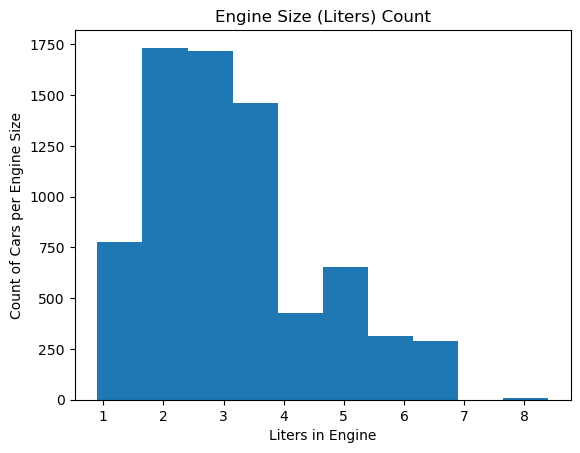

In [5]:
plt.hist(cars['engine_size(l)'])

plt.title("Engine Size (Liters) Count")
plt.xlabel("Liters in Engine")
plt.ylabel("Count of Cars per Engine Size");

**The vast amount of car engines fall between 2 to 4 liters. Cars with 1 liter still represent a decent amount of the cars in the dataset.**

### Question 2: What is the average fuel consumption for regular gasoline (Fuel Type = X), premium gasoline (Z), ethanol (E), and diesel (D)?

In [6]:
cars.fuel_type.value_counts()

X    3637
Z    3202
E     370
D     175
N       1
Name: fuel_type, dtype: int64

**Since there is only one car that is powered on natural gas, I am going to remove it. It doesn't have a big enough sample size to include it in the dataset.**

In [7]:
cars = cars.query('fuel_type != "N"')

In [8]:
# Grouping fuel types and retrieving the average fuel consumption for each fuel type
cars.groupby('fuel_type')['fuel_consumption_comb_(l/100km)'].mean().sort_values()

fuel_type
D     8.835429
X    10.084575
Z    11.422767
E    16.861351
Name: fuel_consumption_comb_(l/100km), dtype: float64

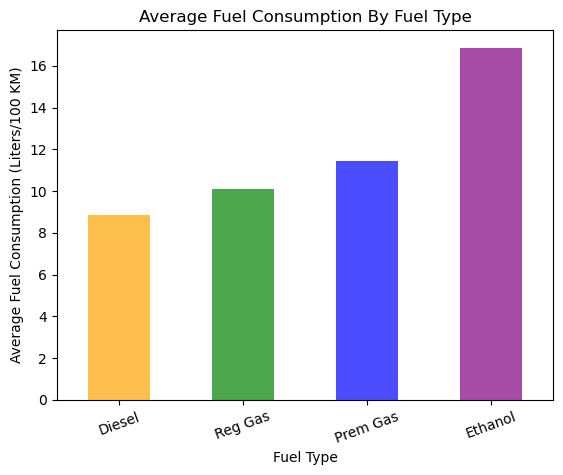

In [9]:
avg_cons = cars.groupby('fuel_type')['fuel_consumption_comb_(l/100km)'].mean().sort_values()
labels = ['Diesel', 'Reg Gas', 'Prem Gas', 'Ethanol']
colors = ['orange', 'green', 'blue', 'purple']

avg_cons.plot(kind = 'bar', color = colors, alpha = 0.7)
plt.title("Average Fuel Consumption By Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Average Fuel Consumption (Liters/100 KM)")
plt.xticks([0, 1, 2, 3], labels, rotation = 20);

### Question 3: What is the correlation between fuel consumption and CO2 emissions?

In [10]:
# Obtaining the correlation coefficient between fuel consumption and co2 emmissions
corr = cars['fuel_consumption_comb_(l/100km)'].corr(cars['co2_emissions(g/km)'])

# Printing the correlation coefficient
print('The correlation between Fuel Consumption and CO2 Emissions is:', round(corr, 2))

The correlation between Fuel Consumption and CO2 Emissions is: 0.92


c:\Users\dario\anaconda3\envs\beautifulmenudo\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


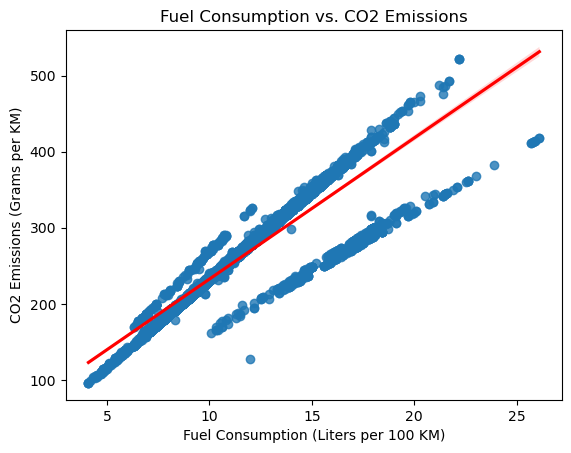

In [11]:
sns.regplot(cars['fuel_consumption_comb_(l/100km)'], cars['co2_emissions(g/km)'], line_kws = {'color' : 'red'}, scatter = True)

plt.title("Fuel Consumption vs. CO2 Emissions")
plt.xlabel("Fuel Consumption (Liters per 100 KM)")
plt.ylabel("CO2 Emissions (Grams per KM)");

**As seen in the graph above, there is a high correlation between CO2 Emissions and Fuel Consumption per 100KM.**

### Question 4: Which vehicle class has lower average CO2 emissions, 'SUV - SMALL' or 'MID-SIZE'? 

In [12]:
# Retrieving all average co2 emissions for each vehicle class
vehicle_class_co2 = cars.groupby('vehicle_class')['co2_emissions(g/km)'].mean().sort_values()

# Printing the average co2 emissions for vehicle classes in ascending order
round(vehicle_class_co2, 2)

vehicle_class
station wagon - small       200.07
compact                     216.68
mid-size                    222.46
suv - small                 236.29
minicompact                 236.61
special purpose vehicle     237.60
station wagon - mid-size    238.70
subcompact                  246.45
minivan                     262.31
full-size                   263.32
two-seater                  277.45
pickup truck - small        278.97
pickup truck - standard     301.51
suv - standard              304.84
van - cargo                 361.50
van - passenger             397.21
Name: co2_emissions(g/km), dtype: float64

### Question 5: What are the average CO2 emissions for all vehicles? For vehicles with an engine size of 2.0 liters or smaller?

In [13]:
# Creating new variable with the average CO2 emissions for all cars in the dataset
avg_emissions = cars['co2_emissions(g/km)'].mean()

# Printing the average CO2 emissions for all cars in the dataset
print('The average CO2 emissions for all cars in the dataset is:', round(avg_emissions, 2), "g/km.")

The average CO2 emissions for all cars in the dataset is: 250.59 g/km.


In [14]:
# Creating new dataframe with cars that have an engine size of 2.0 liters or less
small_engines = cars.query('`engine_size(l)` <= 2.0')

# Finding the average CO2 emissions for the new dataframe
small_engines_co2 = small_engines['co2_emissions(g/km)'].mean()

# Printing the average CO2 emissions for all cars that have an engine size of 2.0 liters or less
print('The average CO2 emissions for cars that have an engine size of 2.0 liters or less is:', round(small_engines_co2, 2), "g/km.")

The average CO2 emissions for cars that have an engine size of 2.0 liters or less is: 198.27 g/km.


### Question 6: Any other insights you found during your analysis?

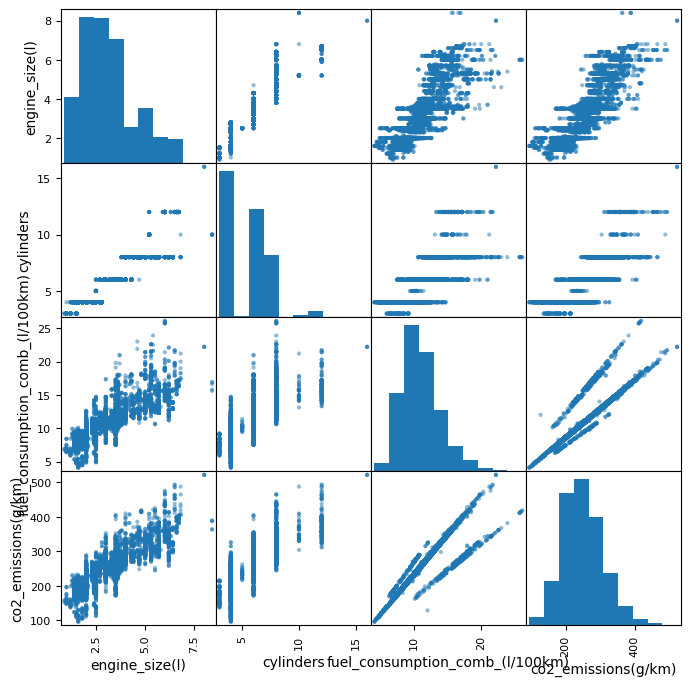

In [15]:
# Plotting a scatter matrix to see if there is anything of interest in this broad overview of the columns
pd.plotting.scatter_matrix(cars, figsize = (8,8));

c:\Users\dario\anaconda3\envs\beautifulmenudo\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


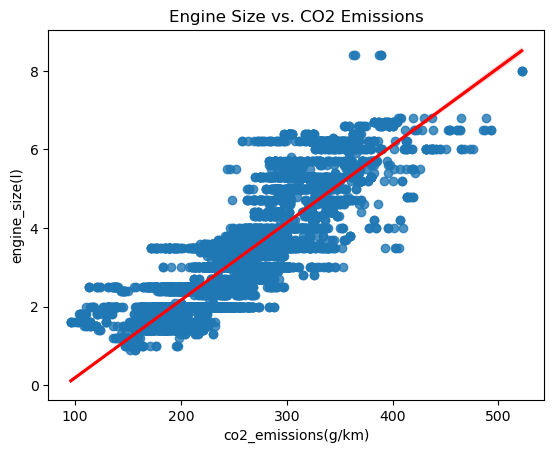

In [16]:
# Plotting Engine Size vs. CO2 emissions
sns.regplot(cars['co2_emissions(g/km)'], cars['engine_size(l)'], line_kws = {'color' : 'red'})

plt.title('Engine Size vs. CO2 Emissions');

In [17]:
# Obtaining the correlation coefficient between fuel consumption and co2 emmissions
corr_2 = cars['co2_emissions(g/km)'].corr(cars['engine_size(l)'])

# Printing the correlation coefficient
print('The correlation between Fuel Consumption and CO2 Emissions is:', round(corr_2, 2))

The correlation between Fuel Consumption and CO2 Emissions is: 0.85


In [18]:
# Checking the top five car manufacturers with the lowest average CO2 emissions of all cars in the dataset
make_emissions = cars.groupby(['make'])['co2_emissions(g/km)'].mean().sort_values()

round(make_emissions.head(5), 2)

make
smart    151.43
honda    190.22
fiat     192.25
mazda    193.67
mini     196.59
Name: co2_emissions(g/km), dtype: float64

In [19]:
# Checking the top five car manufacturers with the highest average CO2 emissions of all cars in the dataset
round(make_emissions.tail(5), 2)

make
bentley        362.93
rolls-royce    388.48
srt            389.00
lamborghini    400.78
bugatti        522.00
Name: co2_emissions(g/km), dtype: float64

In [20]:
# Checking the top five car models with the lowest average CO2 emissions of all cars in the dataset
model_emissions = cars.groupby(['make', 'model'])['co2_emissions(g/km)'].mean().sort_values()

round(model_emissions.head(5), 2)

make     model         
hyundai  ioniq blue         96.00
         ioniq             102.00
toyota   corolla hybrid    106.00
         prius             106.14
         prius awd         109.00
Name: co2_emissions(g/km), dtype: float64

In [21]:
# Checking the top five car models with the highest average CO2 emissions of all cars in the dataset
round(model_emissions.tail(5), 2)

make           model               
lamborghini    aventador s roadster    464.0
               aventador roadster      465.5
mercedes-benz  amg g 65                472.0
ford           e350 wagon              488.0
bugatti        chiron                  522.0
Name: co2_emissions(g/km), dtype: float64

## Q&A

1. **What is the median engine size in liters?**
    - The average engine size of the cars is 3.0 liters.

2. **What is the average fuel consumption for regular gasoline (Fuel Type = X), premium gasoline (Z), ethanol (E), and diesel (D)?**
	- The average fuel consumption, per 100km, for each gas type is as follows:
		1. Regular Gas (10.08L)
		2. Premium Gas (11.42L)
		3. Ethanol (16.86L)
		4. Diesel (8.84L).

3. **What is the correlation between fuel consumption and CO2 emissions?**
	- The correlation between fuel consumption and CO2 emissions is 0.92.
		- This tells us that the correlation between fuel consumption and CO2 emissions are quite high, since this mathematical concept is only between -1 to +1.
		- So, when fuel consumption is higher per 100km, the CO2 emissions will also rise with it.

4. **Which vehicle class has lower average CO2 emissions, 'SUV - SMALL' or 'MID-SIZE'?**
	- Between SUV - SMALL and MID-SIZE, MID-SIZE has the lower average CO2 emissions. 236.29 g/km and 222.46 g/km respectively.

5. **What are the average CO2 emissions for all vehicles? For vehicles with an engine size of 2.0 liters or smaller?**
	- The average CO2 emissions for all cars in the dataset is 250.59 g/km.
	- The average CO2 emissions for vehicles with an engine size of 2.0L or smaller is 198.27 g/km.

6. **What is the correlation between Engine Size and CO2 Emissions?**

	- When comparing engine size to CO2 emissions, there was a 0.85 correlation between the two. This wasn't as strong as fuel consumption vs. CO2 emissions, but it is still a very strong correlation.

7. **What are the top five car manufacturers that produce the lowest CO2 emissions on average?**
    - The top five car manufacturers with the lowest average CO2 emissions of all cars:
        1. Smart (151.43 g/km)
        2. Honda (190.22 g/km)
        3. Fiat (192.25 g/km)
        4. Mazda (193.67 g/km)
        5. Mini (196.59 g/km)

8. **What are the top five car manufacturers that produce the highest CO2 emissions on average?**
	- The top five car manufacturers with the highest average CO2 emissions of all cars:
		1. Bugatti (522.00 g/km)
		2. Lamborghini (400.78 g/km)
		3. SRT (389.00 g/km)
		4. Rolls Royce (388.48 g/km)
		5. Bentley (362.93 g/km)

## Overall Review and Recommendations

**With all of the information presented, there are a few ideas for new guidelines on CO2 emission rules.**

1. Since we know the average engine size is 3.0L, and we know that the bigger the engine, the bigger the CO2 footprint, we can start to do an incremental push over the next 10 years to have newer cars producing less CO2 emissions per car. The highest CO2 emissions in our data shows as 522 g/km. The 10 year goal would be to push that number down to a minimum of the 75% of CO2 emissions found in the data, which is 288 g/km. Just for the sake of an even number, we can keep the number at 300 g/km within 10 years. After that, we can revisit how the car industry is doing, and see what we can do from there. With the rise of electric vehicles, we may have to do two studies to see how they are both performing separately, and together.

2. Another idea we could implement is introducing a carbon footprint tax on all cars who's CO2 emissions are above the suggested maximum amount, whether that's a new car or a used one. We should be pushing to have people stear away from these types of cars if we can't do anything else.

3. Cars that consume the most fuel per 100 KM are cars that run on Ethanol and Premium Gas. This could also be taxed higher since they do, on average, consume more liters of fuel per 100 km. We reviewed that this is correlated to the amount of CO2 emissions that are produced by cars. We can start to push for Diesel and Regular Gas powered cars, and even introduce a small rebate for customers and manufacturers who produce and buy Diesel cars, since that is the lowest Fuel Consumption of all gas types.

## Limitations

1. We are unable to see the year each model was made, so we cannot determine if there is a trend for higher or lower CO2 emissions with newer cars.

2. The dataset did not have a large supply of natural gas powered cars, so we are unable to see how they rank on fuel consumption and CO2 emissions.

3. The dataset did not include anything about electric vehicles, their electricity consumption, and the footprint they are leaving. Electric cars are starting to become a bigger industry, and we need to see the impact they will have on the Earth.